**L074_clustering_optimization.ipynb**

2024 JUN 11

Tershire

**refrence**:

- L074_clustering_optimization

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

# silhouette analysis

In [2]:
from sklearn.metrics import silhouette_samples, silhouette_score

## visualization

In [3]:
def visualize_silhouettes(Clusterer, num_clusterss, X):
    fig, axs = plt.subplots(figsize=(4*len(num_clusterss), 4), nrows=1, ncols=len(num_clusterss))

    cluster_coeff_meanss = []
    for i, num_clusters in enumerate(num_clusterss):
        # training
        clusterer = Clusterer(n_clusters=num_clusters, max_iter=500, random_state=0)
        cluster_ids = clusterer.fit_predict(X)

        # evaluation
        coeffs = silhouette_samples(X, cluster_ids)
        score = silhouette_score(X, cluster_ids)

        y_lower = 10
        cluster_coeff_means = []
        for j in range(num_clusters):
            cluster_coeffs = coeffs[cluster_ids == j]
            cluster_coeff_means.append(np.mean(cluster_coeffs))
            
            cluster_coeffs.sort()

            cluster_num_samples = cluster_coeffs.shape[0]
            y_upper = y_lower + cluster_num_samples
            
            color = cm.nipy_spectral(float(j) / num_clusters)
            axs[i].fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_coeffs,
                                facecolor=color, edgecolor=color, alpha=0.75)
            axs[i].text(-0.05, y_lower + 0.5 * cluster_num_samples, str(j))
            y_lower = y_upper + 10

        axs[i].axvline(x=score, color="red", linestyle="--")

        axs[i].set_title("Number of Clusters: " + str(num_clusters) + '\n' \
                        "Silhouette Score: " + str(np.round(score, 3)))
        axs[i].set_xlabel("Silhouette Coefficients")
        axs[i].set_ylabel("Cluster ID")
        axs[i].set_xlim([-0.1, 1])
        axs[i].set_ylim([0, len(X) + (num_clusters + 1) * 10])
        axs[i].set_xticks(np.linspace(0, 1, 6))
        axs[i].set_yticks([])  # clear

        cluster_coeff_meanss.append(cluster_coeff_means)

    # print cluster standard deviations
    for i, cluster_coeff_means in enumerate(cluster_coeff_meanss):
        print(f"case of {num_clusterss[i]} clusters:")
        print(f"mean sihouette coefficient for each cluster: {np.round(cluster_coeff_meanss[i], 3)}")
        print(f"mean sihouette coefficient standard deviation: {np.round(np.std(cluster_coeff_meanss[i]), 3)}")

In [4]:
def visualize_clustering(Clusterer, num_clusterss, X):
    fig, axs = plt.subplots(figsize=(4*len(num_clusterss), 4), nrows=1, ncols=len(num_clusterss), tight_layout=True)

    for i, num_clusters in enumerate(num_clusterss):
        # training
        clusterer = Clusterer(n_clusters=num_clusters, max_iter=500, random_state=0)
        cluster_ids = clusterer.fit_predict(X)

        cluster_centers = clusterer.cluster_centers_
        axs[i].scatter(x=X[:, 0], y=X[:, 1], edgecolors='k', c=cluster_ids)
        
        for j, cluster_center in enumerate(cluster_centers):
            # shape
            axs[i].scatter(x=cluster_center[0], y=cluster_center[1],
                        s=200, color="white", alpha=0.75,
                        edgecolors='k', marker='o')
            # text
            axs[i].scatter(x=cluster_center[0], y=cluster_center[1],
                        s=70, color='k',
                        edgecolors='k', marker="$%d$" % j)

        axs[i].set_xlabel("feature 1")
        axs[i].set_ylabel("feature 2")

# model

In [5]:
from sklearn.cluster import KMeans

In [6]:
Clusterer = KMeans

# ex. blobs

## data

In [7]:
from sklearn.datasets import make_blobs

In [8]:
X, Y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1,
                 center_box=(-10.0, 10.0), shuffle=True, random_state=1)

## result

case of 2 clusters:
mean sihouette coefficient for each cluster: [0.852 0.656]
mean sihouette coefficient standard deviation: 0.098
case of 3 clusters:
mean sihouette coefficient for each cluster: [0.836 0.43  0.656]
mean sihouette coefficient standard deviation: 0.166
case of 4 clusters:
mean sihouette coefficient for each cluster: [0.605 0.555 0.635 0.807]
mean sihouette coefficient standard deviation: 0.095
case of 5 clusters:
mean sihouette coefficient for each cluster: [0.368 0.529 0.598 0.787 0.277]
mean sihouette coefficient standard deviation: 0.178


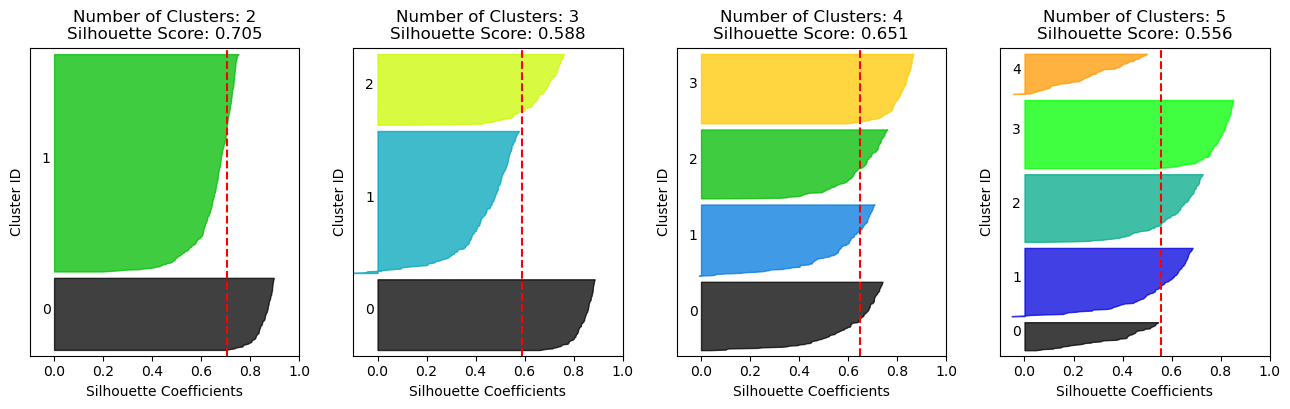

In [9]:
num_clusterss = np.arange(2, 6)
cluster_stddevss = visualize_silhouettes(Clusterer, num_clusterss, X)

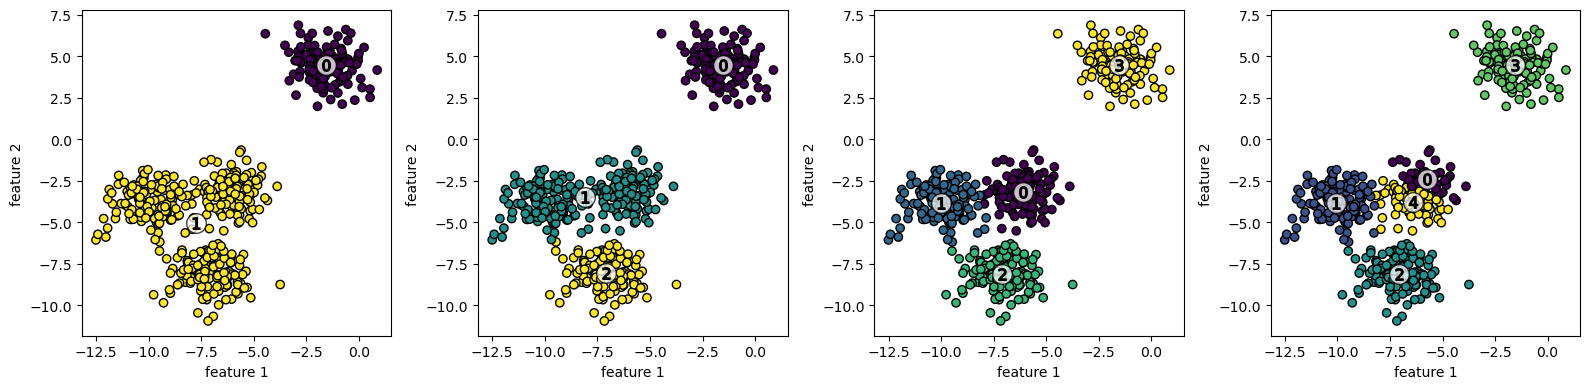

In [10]:
visualize_clustering(Clusterer, num_clusterss, X)

# ex. iris dataset

## data

In [11]:
from sklearn.datasets import load_iris

In [12]:
iris_dataset = load_iris()

X = iris_dataset.data
Y = iris_dataset.target

## result

case of 2 clusters:
mean sihouette coefficient for each cluster: [0.77  0.633]
mean sihouette coefficient standard deviation: 0.068
case of 3 clusters:
mean sihouette coefficient for each cluster: [0.422 0.798 0.437]
mean sihouette coefficient standard deviation: 0.174
case of 4 clusters:
mean sihouette coefficient for each cluster: [0.42  0.763 0.321 0.363]
mean sihouette coefficient standard deviation: 0.175
case of 5 clusters:
mean sihouette coefficient for each cluster: [0.374 0.763 0.285 0.234 0.355]
mean sihouette coefficient standard deviation: 0.187


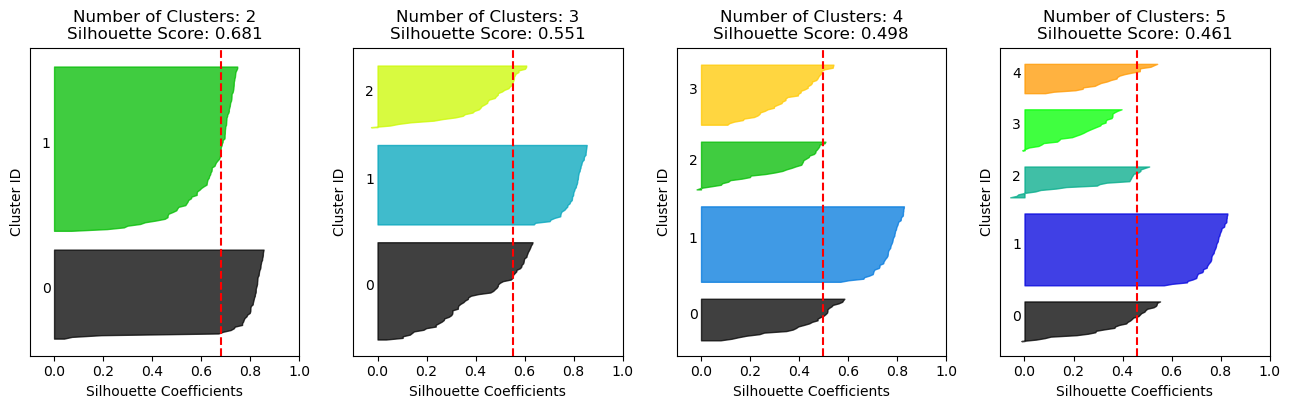

In [13]:
num_clusterss = np.arange(2, 6)
cluster_stddevss = visualize_silhouettes(Clusterer, num_clusterss, X)

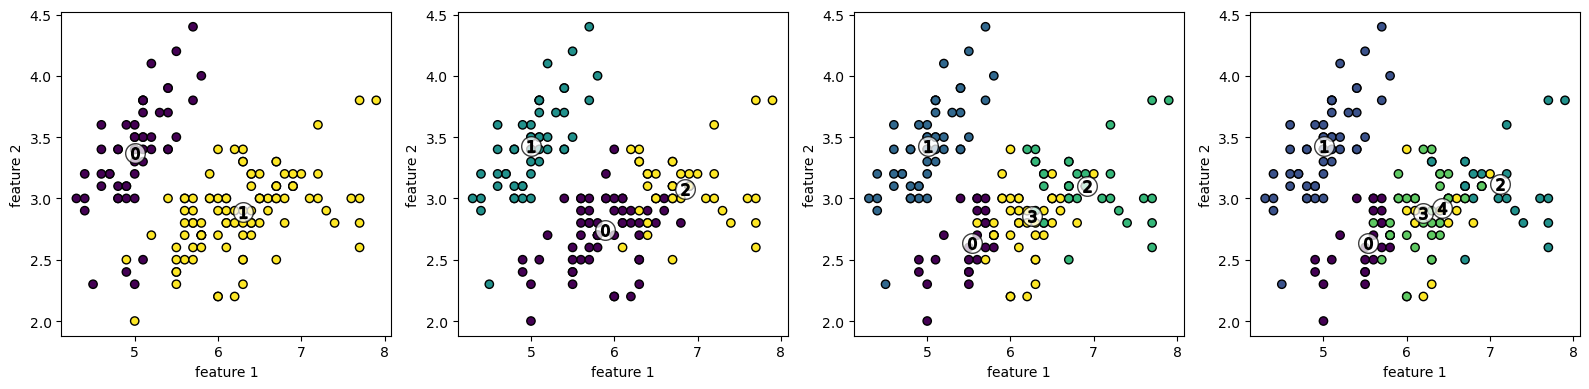

In [14]:
visualize_clustering(Clusterer, num_clusterss, X)